In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




In [43]:
df = pd.read_excel('/content/ACLED_Conflict_Index_FullYear2024_AllColumns.xlsx')
df.head()

,Country,Conflict Level,Deadliness Value,Danger Value,Fragmentation Value,GDP Growth(%),Unemployment Rate
0,Albania,Low,1,6,1,4.019572,8.8
1,Argentina,Low,3,8,1,-1.719108,6.4
2,Australia,Low,0,2,1,1.038257,4.1
3,Austria,Low,0,1,1,-1.335001,7.4
4,Bahrain,Low,0,5,1,-24.428656,5.5


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              88 non-null     object 
 1   Conflict Level       88 non-null     object 
 2   Deadliness Value     88 non-null     int64  
 3   Danger Value         88 non-null     int64  
 4   Fragmentation Value  88 non-null     int64  
 5   GDP Growth(%)        88 non-null     float64
 6   Unemployment Rate    86 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 4.9+ KB


In [45]:
df_encoded = pd.get_dummies(df, columns=['Conflict Level'])

In [46]:
numeric_df = df_encoded.select_dtypes(include =['float64', 'int64'])

In [47]:
numeric_df.fillna(numeric_df.median(), inplace =True)

In [48]:
scalar = StandardScaler()
scaled_features = scalar.fit_transform(numeric_df)

In [49]:
numeric_df.head()

,Deadliness Value,Danger Value,Fragmentation Value,GDP Growth(%),Unemployment Rate
0,1,6,1,4.019572,8.8
1,3,8,1,-1.719108,6.4
2,0,2,1,1.038257,4.1
3,0,1,1,-1.335001,7.4
4,0,5,1,-24.428656,5.5


In [50]:
pca = PCA(n_components=1)
stability_score = pca.fit_transform(scaled_features)
df['Stability_Index'] = stability_score

In [51]:
X = numeric_df
y = df['Stability_Index']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state = 42)




In [52]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
rf_predictions = rf.predict(X_test)

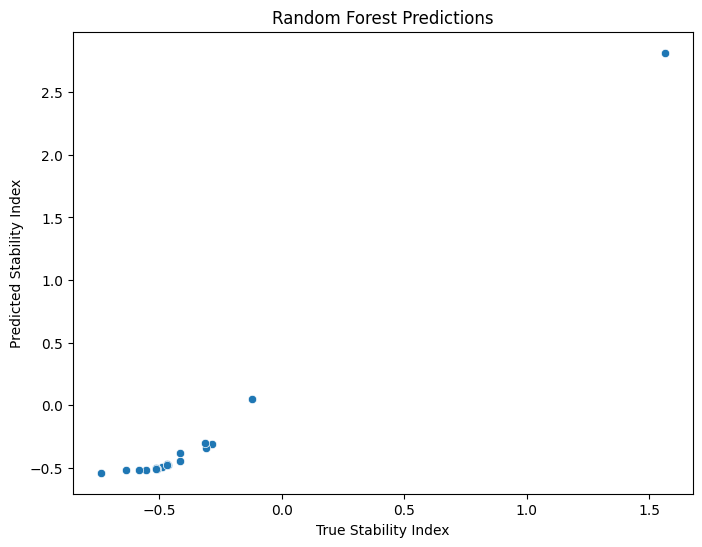

In [54]:
plt.figure(figsize= (8,6))
sns.scatterplot(x=y_test, y=rf_predictions)
plt.xlabel('True Stability Index')
plt.ylabel('Predicted Stability Index')
plt.title('Random Forest Predictions')
plt.show()


In [55]:
rf_score = rf.score(X_test, y_test)
print(f"Random Forest R^2 Score: {rf_score:.2f}")

Random Forest R^2 Score: 0.60


In [56]:
df.describe()

,Deadliness Value,Danger Value,Fragmentation Value,GDP Growth(%),Unemployment Rate,Stability_Index
count,88.000000,88.000000,88.000000,88.000000,86.000000,8.800000e+01
mean,1194.477273,290.590909,10.045455,-0.569144,6.321395,2.018587e-17
std,7333.910210,910.284831,25.607070,8.533251,5.088941,1.422891e+00
min,0.000000,0.000000,0.000000,-26.972127,0.100000,-7.368481e-01
25%,0.000000,2.000000,0.000000,0.528637,3.525000,-5.010538e-01
50%,2.000000,7.000000,1.500000,2.058164,5.100000,-4.586126e-01
75%,26.000000,61.500000,7.500000,3.563634,7.200000,-2.804251e-01
max,67606.000000,5828.000000,164.000000,7.191781,31.900000,7.426378e+00


In [57]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 32522.9473 - val_loss: 180.7634
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 200305.9531 - val_loss: 514.4376
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 26389.1016 - val_loss: 868.0883
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12052.3662 - val_loss: 92.7341
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4624.9370 - val_loss: 5.2927
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1965.4955 - val_loss: 5.6358
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 360.6674 - val_loss: 211.9813
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 71133.3359 - val_loss: 12.8151
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7658.5366 - val_loss: 65.4567
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 15785.3438 - val_loss: 3.1552
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 526.3066 - val_loss: 77.2267
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/s

In [58]:

dl_predictions = model.predict(X_test).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


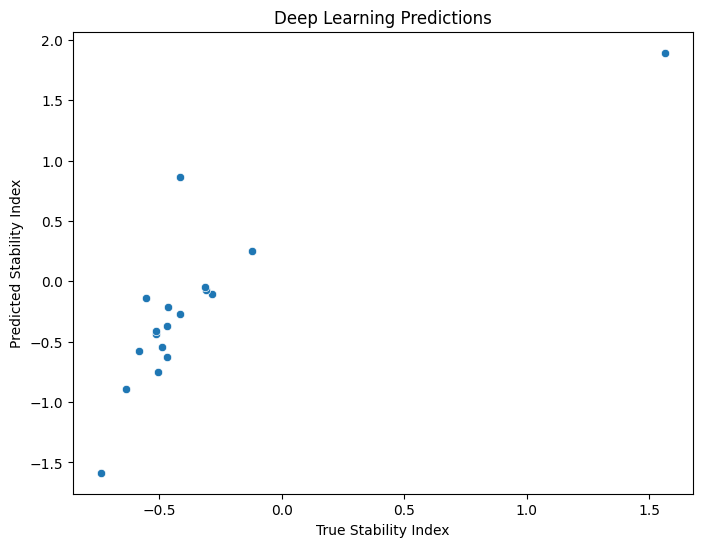

In [60]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=dl_predictions)
plt.xlabel('True Stability Index')
plt.ylabel('Predicted Stability Index')
plt.title('Deep Learning Predictions')
plt.show()



In [61]:
dl_mse = model.evaluate(X_test, y_test)
print(f"Deep Learning MSE: {dl_mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1774
Deep Learning MSE: 0.18
